## Create dataset

In [1]:
import random
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
%matplotlib inline

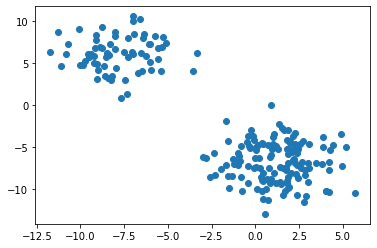

In [2]:
data_points = 200
clusters = 3
X, y = make_blobs(n_samples=data_points, centers=clusters, n_features=2, cluster_std=1.8, random_state=None)
plt.scatter(X[:,0],X[:,1])

In [3]:
def gen_X():
    data_points = 200
    clusters = 3
    X, y = make_blobs(n_samples=data_points, centers=clusters, n_features=2, cluster_std=1.8, random_state=None)
    return X
    

## Functions

In [4]:
def initiate_mu(X,K):
    """
    X: Input data
    K: Number of assumed clusters
    """
    min_val = round(X.min())
    max_val = round(X.max())
    mu = np.zeros([K,2])
    for i in range(K):
        mu_k1 = random.randrange(min_val,max_val)
        mu_k2 = random.randrange(min_val,max_val)
        mu[i,:] = [mu_k1, mu_k2]
        
    return mu

def euclidian(xa,xb):
    return np.sqrt((xa[0] - xb[0])**2 + (xa[1] -xb[1])**2)

def assign_xn_to_closest_mu(X,mu,K):
    # Initiate z
    z = np.zeros([len(X),K])
    
    for i in range(len(X)):
        mu_X_distance = [euclidian(mu[j], X[i]) for j in range(K)] 
        idx = np.argmin(mu_X_distance)
        z[i, idx] = 1
    _,cluster = np.where(z==1)
    return z,cluster

def update_mu_k(X, z, K, mu0):
    mu1 = np.zeros_like(mu0)
    for k in range(K):
        numerator = np.matmul(z[:,k], X)
        denumerator = z[:,k].sum()
        if denumerator == 0:
            mu1[k,:] = 0
        else:
            mu1[k,:] = numerator/denumerator
    mu0 = mu1
    return (mu0 ,mu1)


def update2_mu_k(X, z, K, mu0):
    """Denna är för funcanim (mu delta)"""
    mu1 = np.zeros_like(mu0)
    for k in range(K):
        numerator = np.matmul(z[:,k], X)
        denumerator = z[:,k].sum()
        if denumerator == 0:
            mu1[k,:] = 0
        else:
            mu1[k,:] = numerator/denumerator
    mu_delta = mu1 -mu0
    return (mu_delta,mu1)

def Kmeans(mu0, X,K): #mu0, X,cluster,K
    z, cluster = assign_xn_to_closest_mu(X, mu0, K)
    mu_delta ,mu1 = update2_mu_k(X, z, K, mu0)
    return mu_delta, mu1, cluster

## Algorithm

In [876]:
#1 Assume there are K clusters
#2 Each cluster is defined by a position in the input space mu_k = [mu_k1, mu_k2]^T
#3 Each x_n is assigned to its closest cluster
#4 Distance is normally Euclidian distancebut other choices is also available

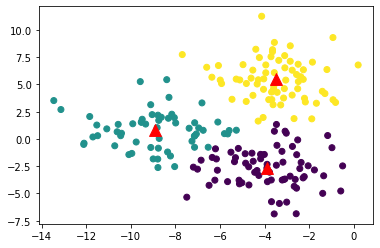

In [192]:
%matplotlib inline
# Assume K amount of clusters
K = 3
X = gen_X() # Initiate X
# 1 Guess mu
mu0 = initiate_mu(X,K)

mu_delta = mu0
while not np.all(mu_delta ==0):
    mu_delta, mu1, cluster = Kmeans(mu0,X,K)
    mu0 = mu1
    
plt.scatter(X[:,0],X[:,1],c=cluster)
plt.scatter(mu1[:,0].T, mu1[:,1],marker="^",s=140,c="r")


## Funcaniom FUNKAR EJ

<IPython.core.display.Javascript object>


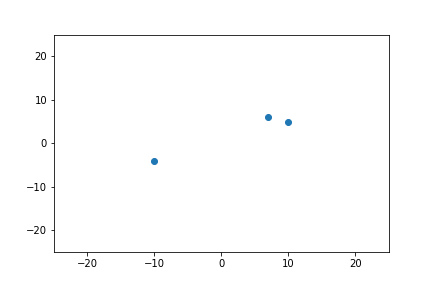

ValueError: too many values to unpack (expected 2)

In [134]:
%matplotlib notebook
fig,ax = plt.subplots(1,1)

mu0 = initiate_mu(X,K)
#centers = ax.scatter(1,1)
centers = ax.scatter(mu0[:,0], mu0[:,1])
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
#ax.scatter(X[:,0],X[:,1],c=cluster)
mu_delta, mu1 = Kmeans(mu0, X,K)

def update(mu_delta,mu0):
    
    #for j in range(10):
    #mu1 = initiate_mu(X,K)
    #mu_delta, mu1 = Kmeans(mu0, X,K)
    #mu_delta += 0.01
    centers.set_offsets(mu_delta)
    #centers.set_array(mu_delta)
    #mu0 = mu1
    return centers,mu_delta


animation = FuncAnimation(fig, func=update, frames=100, interval=10)

## Med funcanim old

<IPython.core.display.Javascript object>


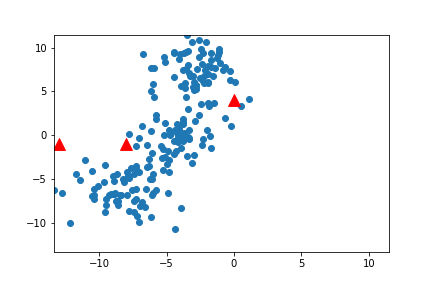

In [122]:
%matplotlib notebook
# Assume K amount of clusters
K = 3 

# 1 Guess mu
mu0 = initiate_mu(X,K)
#mu1 = np.zeros_like(mu0)

fig,ax = plt.subplots(1,1)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(X.min(), X.max())
X2 = np.zeros_like(X)

cluster = np.ones(len(X))
#datapoints = ax.scatter(X2[:,0],X2[:,1],c=cluster)
datapoints = ax.scatter(X[:,0],X[:,1])
centers = ax.scatter(mu0[:,0].T, mu0[:,1],marker="^",s=140,c="r")
#plot = ax.scatter(a.x,a.y)

#while (abs(mu0) -abs((mu1))).sum() > 1: 
def update(i):
    for _ in range(5):
        # 2 & 3 Assign x_n to its closest mu_k (Also cluster variable)
        z, cluster = assign_xn_to_closest_mu(X, mu0, K)

        # 4 Update mu_k
        mu0, mu1 = update_mu_k(X, z, K, mu0)

        offsets = np.array([mu1[:,0], mu1[:,1]])
        centers.set_offsets(offsets)
        datapoints.set_array(cluster)
    return centers, datapoints
    
#plt.scatter(X[:,0],X[:,1],c=cluster)
#plt.scatter(mu1[:,0].T,mu1[:,1],marker="^",s=140,c="r")

animation = FuncAnimation(fig, update, interval=5)


## Tryout

<IPython.core.display.Javascript object>


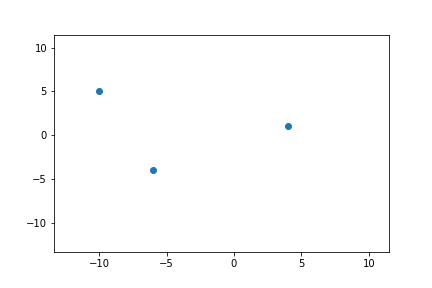

In [121]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.animation import FuncAnimation
# Assume K amount of clusters
K = 3 

# 1 Guess mu
mu1 = initiate_mu(X,K)
#mu1 = np.zeros_like(mu0)

fig,ax = plt.subplots(1,1)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(X.min(), X.max())

centers = ax.scatter(mu1[:,0], mu1[:,1])
#plot = ax.scatter(a.x,a.y)

#while (abs(mu0) -abs((mu1))).sum() > 1: 
def update(i):
    #for j in range(100):
    mu1 += 1
    offsets = np.array([mu1[:,0], mu1[:,1]])
    centers.set_offsets(offsets)
        
    #return centers

animation = FuncAnimation(fig, update, interval=5)

<IPython.core.display.Javascript object>


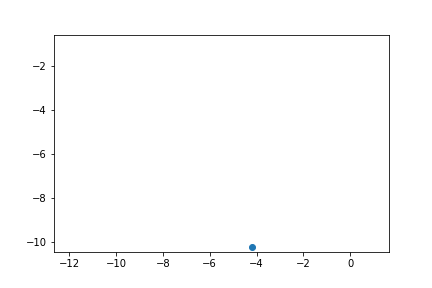

In [120]:
%matplotlib notebook
fig,ax = plt.subplots(1,1)

mu0 = initiate_mu(X,K)
#centers = ax.scatter(1,1)
centers = ax.scatter(mu0[:,0], mu0[:,1])
#ax.set_xlim(-10,10)
#ax.set_ylim(-10,10)

def update(i):
    for j in range(10):
        #OF = np.random.rand(3,2)
        OF = mu1
        OF += 0.01
        #offsets = np.array(OF)
        centers.set_offsets(OF)
    return centers,OF

animation = FuncAnimation(fig, func=update,frames=100, interval=10)

<IPython.core.display.Javascript object>


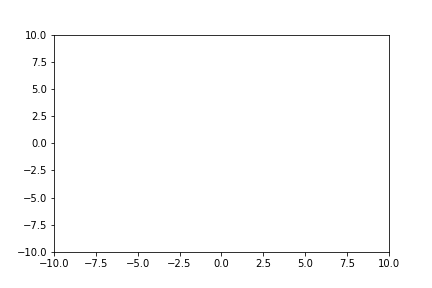

In [119]:
fig,ax = plt.subplots(1,1)
x = [1,2,3,4]
y = [5,6,7,8]

centers = ax.scatter(x, y)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

def update(i):
    for j in range(100):
        mul2 = np.ones([4,2])
        offsets = np.array(mul2)
        centers.set_offsets(offsets)
    return centers

animation = FuncAnimation(fig, func=update,frames=10, interval=2)

In [114]:
centers.get_offsets()

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [115]:
mul2 = np.ones([4,2])
offsets = np.array(mul2)
centers.set_offsets(offsets)

<IPython.core.display.Javascript object>


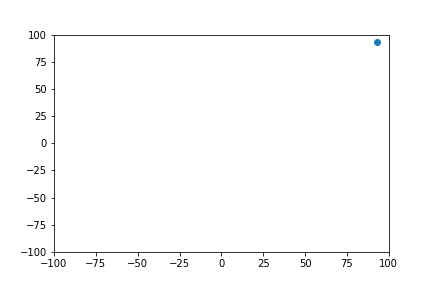

In [118]:
fig,ax = plt.subplots(1,1)
centers = ax.scatter(1,1)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

def update(i):
    #for j in range(100):
    offsets = np.array([i, i])
    centers.set_offsets(offsets)

    return centers

animation = FuncAnimation(fig, func=update,frames=100, interval=2)